In [283]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import f1_score

# Load dataset
df = pd.read_csv('finalDataset.csv')
# Drop the first column
df = df.drop(df.columns[0], axis=1)
df

,Mileage,Model Year,Brand,Model,Nombre de portes,Origine,Première main,Fuel type,Fiscal power,boiteVitesse,Price
0,90 000 - 94 999,2012,Peugeot,206+,5.0,WW au Maroc,Non,Essence,6 CV,Manuelle,60000.0
1,25 000 - 29 999,2011,Peugeot,Partner,NaN,NaN,NaN,Diesel,7 CV,Manuelle,62000.0
2,250 000 - 299 999,2010,Dacia,Sandero,5.0,NaN,Non,Diesel,6 CV,Manuelle,65000.0
3,200 000 - 249 999,2008,Volkswagen,Touareg,5.0,WW au Maroc,Non,Diesel,12 CV,Automatique,NaN
4,150 000 - 159 999,2008,Daihatsu,Sirion,NaN,NaN,NaN,Essence,--,--,48000.0
...,...,...,...,...,...,...,...,...,...,...,...
64852,NaN,2001,NaN,NaN,NaN,NaN,NaN,Diesel,9 CV,NaN,83000.0
64853,10000-14999,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7000.0
64854,NaN,2007,NaN,NaN,NaN,NaN,NaN,Diesel,10 CV,NaN,120000.0
64855,0-4999,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10500.0


In [284]:
# Checking null values
df.isnull().sum()

Mileage                10
Model Year              5
Brand                  18
Model                  18
Nombre de portes    31574
Origine             33010
Première main       34638
Fuel type              12
Fiscal power         9288
boiteVitesse        35874
Price                3160
dtype: int64

In [285]:
# Drop columns with non-NA count less than threshold that is more than half the rows number
df = df.dropna(axis=1, thresh=40000)
df.isnull().sum()

Mileage           10
Model Year         5
Brand             18
Model             18
Fuel type         12
Fiscal power    9288
Price           3160
dtype: int64

In [286]:
# Handle missing values
imputer = SimpleImputer(strategy='most_frequent')  # or median, most_frequent, constant, etc.
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df.isnull().sum()

Mileage         0
Model Year      0
Brand           0
Model           0
Fuel type       0
Fiscal power    0
Price           0
dtype: int64

In [287]:
df

,Mileage,Model Year,Brand,Model,Fuel type,Fiscal power,Price
0,90 000 - 94 999,2012,Peugeot,206+,Essence,6 CV,60000.0
1,25 000 - 29 999,2011,Peugeot,Partner,Diesel,7 CV,62000.0
2,250 000 - 299 999,2010,Dacia,Sandero,Diesel,6 CV,65000.0
3,200 000 - 249 999,2008,Volkswagen,Touareg,Diesel,12 CV,55000.0
4,150 000 - 159 999,2008,Daihatsu,Sirion,Essence,--,48000.0
...,...,...,...,...,...,...,...
64852,200000-249999,2001,Renault,Logan,Diesel,9 CV,83000.0
64853,10000-14999,2019,Renault,Logan,Diesel,6 CV,7000.0
64854,200000-249999,2007,Renault,Logan,Diesel,10 CV,120000.0
64855,0-4999,2018,Renault,Logan,Diesel,6 CV,10500.0


In [288]:
df['Fiscal power'] = df['Fiscal power'].str.strip().replace('Plus de 41', 41, regex=True)
df

,Mileage,Model Year,Brand,Model,Fuel type,Fiscal power,Price
0,90 000 - 94 999,2012,Peugeot,206+,Essence,6 CV,60000.0
1,25 000 - 29 999,2011,Peugeot,Partner,Diesel,7 CV,62000.0
2,250 000 - 299 999,2010,Dacia,Sandero,Diesel,6 CV,65000.0
3,200 000 - 249 999,2008,Volkswagen,Touareg,Diesel,12 CV,55000.0
4,150 000 - 159 999,2008,Daihatsu,Sirion,Essence,--,48000.0
...,...,...,...,...,...,...,...
64852,200000-249999,2001,Renault,Logan,Diesel,9 CV,83000.0
64853,10000-14999,2019,Renault,Logan,Diesel,6 CV,7000.0
64854,200000-249999,2007,Renault,Logan,Diesel,10 CV,120000.0
64855,0-4999,2018,Renault,Logan,Diesel,6 CV,10500.0


In [289]:
df['Fiscal power'].replace(['--'], np.nan, inplace=True)
df

,Mileage,Model Year,Brand,Model,Fuel type,Fiscal power,Price
0,90 000 - 94 999,2012,Peugeot,206+,Essence,6 CV,60000.0
1,25 000 - 29 999,2011,Peugeot,Partner,Diesel,7 CV,62000.0
2,250 000 - 299 999,2010,Dacia,Sandero,Diesel,6 CV,65000.0
3,200 000 - 249 999,2008,Volkswagen,Touareg,Diesel,12 CV,55000.0
4,150 000 - 159 999,2008,Daihatsu,Sirion,Essence,NaN,48000.0
...,...,...,...,...,...,...,...
64852,200000-249999,2001,Renault,Logan,Diesel,9 CV,83000.0
64853,10000-14999,2019,Renault,Logan,Diesel,6 CV,7000.0
64854,200000-249999,2007,Renault,Logan,Diesel,10 CV,120000.0
64855,0-4999,2018,Renault,Logan,Diesel,6 CV,10500.0


In [290]:
df['Fiscal power'] = df['Fiscal power'].str.strip().replace('CV', '', regex=True)
df

,Mileage,Model Year,Brand,Model,Fuel type,Fiscal power,Price
0,90 000 - 94 999,2012,Peugeot,206+,Essence,6,60000.0
1,25 000 - 29 999,2011,Peugeot,Partner,Diesel,7,62000.0
2,250 000 - 299 999,2010,Dacia,Sandero,Diesel,6,65000.0
3,200 000 - 249 999,2008,Volkswagen,Touareg,Diesel,12,55000.0
4,150 000 - 159 999,2008,Daihatsu,Sirion,Essence,NaN,48000.0
...,...,...,...,...,...,...,...
64852,200000-249999,2001,Renault,Logan,Diesel,9,83000.0
64853,10000-14999,2019,Renault,Logan,Diesel,6,7000.0
64854,200000-249999,2007,Renault,Logan,Diesel,10,120000.0
64855,0-4999,2018,Renault,Logan,Diesel,6,10500.0


In [291]:
imputer = SimpleImputer(strategy='most_frequent')  # or median, most_frequent, constant, etc.
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df['Fiscal power'] = df['Fiscal power'].astype(int)
df

,Mileage,Model Year,Brand,Model,Fuel type,Fiscal power,Price
0,90 000 - 94 999,2012,Peugeot,206+,Essence,6,60000.0
1,25 000 - 29 999,2011,Peugeot,Partner,Diesel,7,62000.0
2,250 000 - 299 999,2010,Dacia,Sandero,Diesel,6,65000.0
3,200 000 - 249 999,2008,Volkswagen,Touareg,Diesel,12,55000.0
4,150 000 - 159 999,2008,Daihatsu,Sirion,Essence,6,48000.0
...,...,...,...,...,...,...,...
64852,200000-249999,2001,Renault,Logan,Diesel,9,83000.0
64853,10000-14999,2019,Renault,Logan,Diesel,6,7000.0
64854,200000-249999,2007,Renault,Logan,Diesel,10,120000.0
64855,0-4999,2018,Renault,Logan,Diesel,6,10500.0


In [292]:
# Convert non numerical values
df['Mileage'] = df['Mileage'].str.replace(' ', '')
df['Mileage'] = df['Mileage'].str.replace('Plusde500000', '500000-1000000')
df['Model Year'] = df['Model Year'].str.replace('1980 ou plus ancien', '1980')
df['Mileage'].unique()

array(['90000-94999', '25000-29999', '250000-299999', '200000-249999',
       '150000-159999', '170000-179999', '300000-349999', '130000-139999',
       '10000-14999', '140000-149999', '75000-79999', '190000-199999',
       '0-4999', '110000-119999', '55000-59999', '30000-34999',
       '180000-189999', '160000-169999', '95000-99999', '35000-39999',
       '80000-84999', '15000-19999', '350000-399999', '5000-9999',
       '120000-129999', '20000-24999', '60000-64999', '40000-44999',
       '85000-89999', '65000-69999', '100000-109999', '70000-74999',
       '400000-449999', '50000-54999', '450000-499999', '500000-1000000',
       '45000-49999'], dtype=object)

In [293]:
# Remove spaces and convert the columns to integers
df[['lower_mileage', 'upper_mileage']] = df['Mileage'].str.split('-', expand=True).astype(int)
# Calculate the mid_point
df['Mid_Point'] = (df['lower_mileage'] + df['upper_mileage']) / 2
df = df.drop(['lower_mileage', 'upper_mileage', 'Mileage'], axis=1)
df

,Model Year,Brand,Model,Fuel type,Fiscal power,Price,Mid_Point
0,2012,Peugeot,206+,Essence,6,60000.0,92499.5
1,2011,Peugeot,Partner,Diesel,7,62000.0,27499.5
2,2010,Dacia,Sandero,Diesel,6,65000.0,274999.5
3,2008,Volkswagen,Touareg,Diesel,12,55000.0,224999.5
4,2008,Daihatsu,Sirion,Essence,6,48000.0,154999.5
...,...,...,...,...,...,...,...
64852,2001,Renault,Logan,Diesel,9,83000.0,224999.5
64853,2019,Renault,Logan,Diesel,6,7000.0,12499.5
64854,2007,Renault,Logan,Diesel,10,120000.0,224999.5
64855,2018,Renault,Logan,Diesel,6,10500.0,2499.5


In [294]:
# Encode categorical data
encoder = LabelEncoder()
categorical_columns = df.iloc[:, 1:4]

df_encoded = df

for column in categorical_columns:
    df_encoded[column] = encoder.fit_transform(df[column])

df_encoded

,Model Year,Brand,Model,Fuel type,Fiscal power,Price,Mid_Point
0,2012,49,33,3,6,60000.0,92499.5
1,2011,49,568,1,7,62000.0,27499.5
2,2010,17,660,1,6,65000.0,274999.5
3,2008,62,728,1,12,55000.0,224999.5
4,2008,19,692,3,6,48000.0,154999.5
...,...,...,...,...,...,...,...
64852,2001,52,492,1,9,83000.0,224999.5
64853,2019,52,492,1,6,7000.0,12499.5
64854,2007,52,492,1,10,120000.0,224999.5
64855,2018,52,492,1,6,10500.0,2499.5


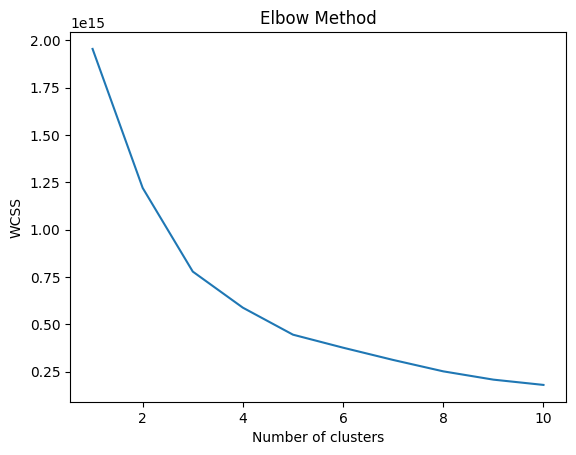

In [295]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []

# let's assume our max number of clusters would be 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_encoded)
    wcss.append(kmeans.inertia_)
    
# Plot the results
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## We can see here that 3 is in the "Elbow" of the graph, we'll take it as a parameter

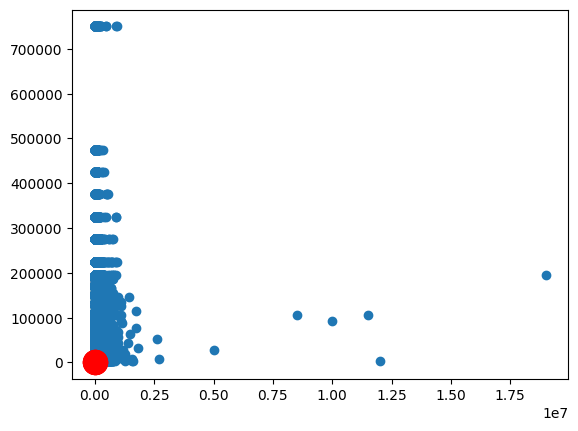

In [296]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df_encoded)

# Visualize the clusters
plt.scatter(df_encoded['Price'], df['Mid_Point'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()


## The clusters are not very clear, we'll try feature scaling since K-means are very sensitive to scale, and get rid of outliers

In [297]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
df_scaled = scaler.fit_transform(df_encoded)

# Convert the numpy array back into a pandas DataFrame 
df_scaled = pd.DataFrame(df_scaled, columns=df_encoded.columns)
df_scaled

,Model Year,Brand,Model,Fuel type,Fiscal power,Price,Mid_Point
0,0.610093,0.566556,-1.514837,1.765893,-0.572382,-0.193058,-0.346019
1,0.496460,0.566556,0.744766,-0.563597,-0.071715,-0.178399,-0.951765
2,0.382827,-1.248146,1.133334,-0.563597,-0.572382,-0.156412,1.354729
3,0.155561,1.303778,1.420536,-0.563597,2.431620,-0.229704,0.888770
4,0.155561,-1.134727,1.268488,1.765893,-0.572382,-0.281009,0.236429
...,...,...,...,...,...,...,...
64852,-0.639870,0.736684,0.423776,-0.563597,0.929619,-0.024486,0.888770
64853,1.405524,0.736684,0.423776,-0.563597,-0.572382,-0.581507,-1.091552
64854,0.041928,0.736684,0.423776,-0.563597,1.430286,0.246695,0.888770
64855,1.291891,0.736684,0.423776,-0.563597,-0.572382,-0.555854,-1.184744


In [298]:
from scipy import stats

z_scores = stats.zscore(df_scaled)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 2.5).all(axis=1)
df_scaled = df_scaled[filtered_entries]
df_scaled

,Model Year,Brand,Model,Fuel type,Fiscal power,Price,Mid_Point
0,0.610093,0.566556,-1.514837,1.765893,-0.572382,-0.193058,-0.346019
1,0.496460,0.566556,0.744766,-0.563597,-0.071715,-0.178399,-0.951765
2,0.382827,-1.248146,1.133334,-0.563597,-0.572382,-0.156412,1.354729
3,0.155561,1.303778,1.420536,-0.563597,2.431620,-0.229704,0.888770
4,0.155561,-1.134727,1.268488,1.765893,-0.572382,-0.281009,0.236429
...,...,...,...,...,...,...,...
64852,-0.639870,0.736684,0.423776,-0.563597,0.929619,-0.024486,0.888770
64853,1.405524,0.736684,0.423776,-0.563597,-0.572382,-0.581507,-1.091552
64854,0.041928,0.736684,0.423776,-0.563597,1.430286,0.246695,0.888770
64855,1.291891,0.736684,0.423776,-0.563597,-0.572382,-0.555854,-1.184744


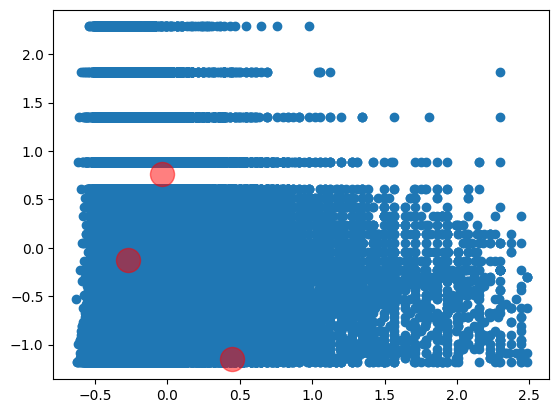

In [299]:
# Apply K-means clustering
kmeans_scaled = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y_scaled = kmeans_scaled.fit_predict(df_scaled)

# Visualize the clusters (you can change 'Price' and 'mid_point' to other numerical columns if needed)
plt.scatter(df_scaled['Price'], df_scaled['Mid_Point'])
plt.scatter(kmeans_scaled.cluster_centers_[:, 0], kmeans_scaled.cluster_centers_[:, 1], s=300, c='red', alpha = 0.5)
plt.show()


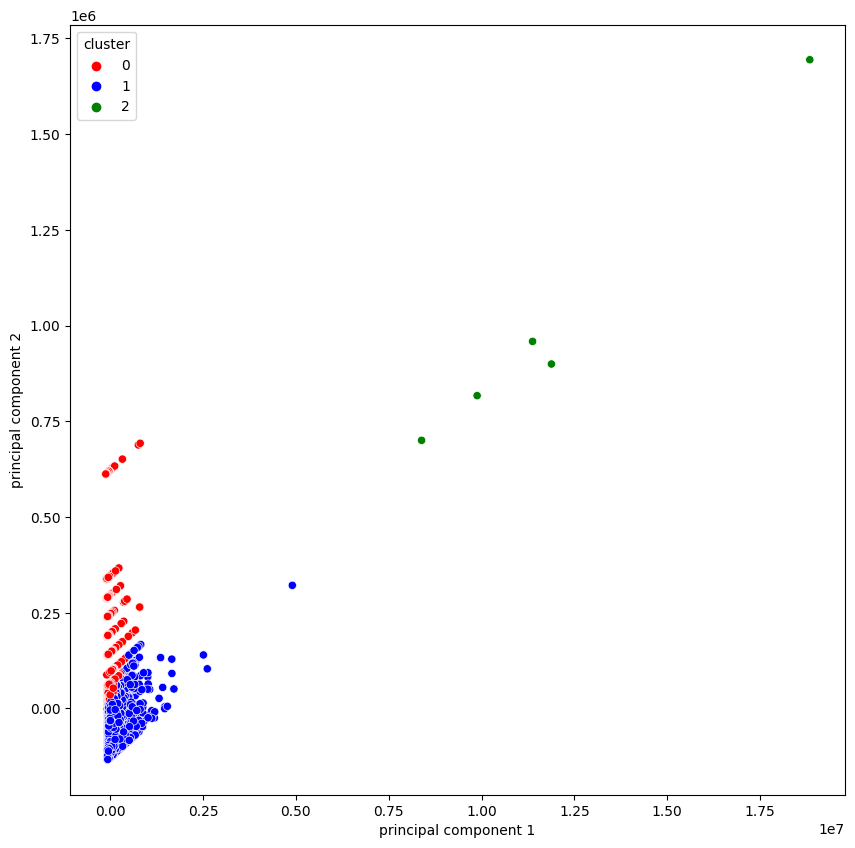

In [300]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

# Adding cluster to the principalDf
principalDf = pd.concat([principalDf, pd.DataFrame({'cluster':kmeans.labels_})], axis = 1)

# Visualize the clusters
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="principal component 1", y="principal component 2", hue="cluster", data=principalDf, palette=['red', 'blue', 'green'])
plt.show()

# Let's make a dataframe where we map each model in a category

In [301]:
from sklearn.preprocessing import LabelEncoder

# Assume that you have the original data before encoding in a DataFrame called original_df
original_df = pd.read_csv('finalDataset.csv')

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the encoder to the car models in the original data
le.fit(original_df['Model'])

# Now create a new column in your dataframe with the decoded car model names
df['Model'] = le.inverse_transform(df['Model'])

# Now add the cluster labels as a new column in the DataFrame
df['cluster'] = kmeans.labels_

# Create a new DataFrame with the car model as the index
df_clusters = df.set_index('Model')

# Use groupby to create a DataFrame with the cluster as columns
df_clusters = df_clusters.groupby(['Model', 'cluster']).size().unstack(fill_value=0)

df_clusters.columns = ['cluster_{}'.format(cluster) for cluster in df_clusters.columns]
df_clusters

,cluster_0,cluster_1,cluster_2
Model,,,
100,3,3,0
1007,1,5,0
104,8,33,0
106,13,42,0
107,3,48,0
...,...,...,...
santa_fe,0,1,0
serie_3,0,1,0
super5,0,1,0


# Since we made dimension reduction before we can't know directly what each cluster means, so we will just see the mean value of the price of each value, and assume that clusters are related to the value of the car.

In [302]:
# Group the DataFrame by the cluster labels and calculate the mean price of each group
mean_price_per_cluster = df.groupby('cluster')['Price'].mean()

print(mean_price_per_cluster)

cluster
0    6.966611e+04
1    9.453810e+04
2    1.220000e+07
Name: Price, dtype: float64


# It seems that cluster 0 is economic, cluster 1 is mid-range and custer 2 is luxury

In [303]:
df_clusters = df_clusters.rename(columns={'cluster_0': 'economic', 'cluster_1': 'mid-range', 'cluster_2': 'luxury'})
df_clusters

,economic,mid-range,luxury
Model,,,
100,3,3,0
1007,1,5,0
104,8,33,0
106,13,42,0
107,3,48,0
...,...,...,...
santa_fe,0,1,0
serie_3,0,1,0
super5,0,1,0


# Let's check the value of a particual car to see where it belongs

In [304]:
df_clusters.loc["208"]

economic      17
mid-range    360
luxury         0
Name: 208, dtype: int64

# We can see that it's mainly a mid range car

In [305]:
df_clusters.loc["Golf"]

economic      72
mid-range    193
luxury         0
Name: Golf, dtype: int64

# Also a mid range car, but probably have many old models

# Supervised price prediction

In [309]:
df_encoded['Model'] = le.transform(df_encoded['Model'])
df_encoded

,Model Year,Brand,Model,Fuel type,Fiscal power,Price,Mid_Point,cluster
0,2012,49,33,3,6,60000.0,92499.5,1
1,2011,49,568,1,7,62000.0,27499.5,1
2,2010,17,660,1,6,65000.0,274999.5,0
3,2008,62,728,1,12,55000.0,224999.5,0
4,2008,19,692,3,6,48000.0,154999.5,0
...,...,...,...,...,...,...,...,...
64852,2001,52,492,1,9,83000.0,224999.5,0
64853,2019,52,492,1,6,7000.0,12499.5,1
64854,2007,52,492,1,10,120000.0,224999.5,0
64855,2018,52,492,1,6,10500.0,2499.5,1


In [363]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split the data into features and target variable
X = df_encoded.drop(['Price', 'cluster'], axis=1)
y = df_encoded['Price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make price predictions
y_pred = model.predict(X_test)

# Print the predicted prices
print(y_pred)

[ 38308.4631404   11677.707522   133936.99160861 ...  89866.75096051
 121975.54225012  95942.85328462]


In [369]:
# Create an empty dictionary to store parameter values
data = {}

# Get input from the user for each parameter
data['Model Year'] = 2006           
data['Brand'] = 'Peugeot'                  
data['Model'] = '208'                    
data['Fuel type'] = 'Essence'               
data['Fiscal power'] = 6             
data['Mid_Point'] = 20000                


data = {
    'Model Year': input("Enter Model Year: "),
    'Brand': input("Enter Brand: "),
    'Model': input("Enter Model: "),
    'Fuel type': input("Enter Fuel type: "),
    'Fiscal power': input("Enter Fiscal power: "),
    'Mid_Point': input("Enter Mid Point: ")
}

data = pd.DataFrame(data, index=['ID'])
data.index.name = 'Index'
print(data)

      Model Year    Brand   Model Fuel type Fiscal power Mid_Point
Index                                                             
ID          2018  Renault  Megane    Diesel            6     64000


In [370]:
# Assume that you have the original data before encoding in a DataFrame called original_df
original_df = pd.read_csv('finalDataset.csv')

# Create a LabelEncoder object for each categorical column
brand_encoder = LabelEncoder()
model_encoder = LabelEncoder()
fuel_type_encoder = LabelEncoder()

# Fit the encoders to the car models in the original data
brand_encoder.fit(original_df['Brand'])
model_encoder.fit(original_df['Model'])
fuel_type_encoder.fit(original_df['Fuel type'])

# Transform the data using the fitted encoders
data['Brand'] = brand_encoder.transform([data['Brand']])[0]
data['Model'] = model_encoder.transform([data['Model']])[0]
data['Fuel type'] = fuel_type_encoder.transform([data['Fuel type']])[0]

data

/home/amine/PythonProjects/VirtualEnvironments/data_env/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/home/amine/PythonProjects/VirtualEnvironments/data_env/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/home/amine/PythonProjects/VirtualEnvironments/data_env/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtyp

,Model Year,Brand,Model,Fuel type,Fiscal power,Mid_Point
Index,,,,,,
ID,2018,52,519,1,6,64000


In [371]:
predicted_price = model.predict(data[['Model Year', 'Brand', 'Model', 'Fuel type', 'Fiscal power', 'Mid_Point']])

predicted_price

array([139068.83776055])

In [356]:
original_df['Model'].unique()

array(['206+', 'Partner', 'Sandero', 'Touareg', 'Sirion', 'Duster', '407',
       'Macan', '250', 'Punto', 'Corolla', 'Santa Fe', 'Classe E', 'C4',
       'Clio', 'Qashqai', 'Berlingo', 'R11', '206', 'Symbol', 'Palio',
       'Elantra', 'Bora', 'i 40', 'Dokker', 'Vitara', 'Insignia', 'Uno',
       '405', 'Tiguan', '220', 'A113', 'Fiesta', 'Jetta', 'Leon', 'Doblo',
       'Logan', 'Pinto', 'Passat', '207', '308', 'Kangoo', 'Megane', 'Q3',
       '208', 'Golf', 'Ceed', 'REGATA', '307', '500', 'Touran', 'Picanto',
       'i 20', '270', 'Range Rover Evoque', 'C3', 'Serie 3 coupé', '406',
       'Crossland X', 'Classe A', 'Serie 4', 'Accent', 'Classe C',
       'Carens', 'Astra', 'Serie 7', 'i 30', 'Megane Coupe', '2',
       'Range Rover', 'Polo', 'GOLF 5', 'Tucson', 'Scenic', 'Civic',
       'i 10', 'A4', 'RAV 4', 'cooper', 'Wrangler', '190', 'A3', '3008',
       'Q5', 'D-MAX', 'Siena', '2008', 'pajero', 'Mondeo', 'CR-V', '309',
       'Panda', 'C-Elysée', 'Prado', 'C5', 'Serie 5', '310D'